### Dataset

In [228]:
import numpy as np
np.random.seed(42)

In [229]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [230]:
boston = datasets.load_boston()
x, y = boston.data[:, 1:3], boston.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

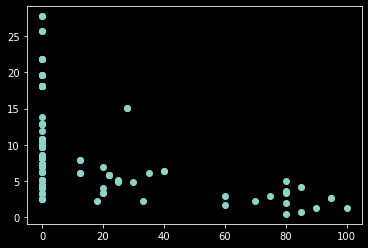

Min: [0.   0.46]
Max: [100.    27.74]
Mean: [11.26973684 11.14546053]
Std: [24.90150872  6.67496628]


In [231]:
plt.scatter(x_test[:, 0], x_test[:, 1])
plt.show()

print(f"Min: {np.min(x_test, axis=0)}")
print(f"Max: {np.max(x_test, axis=0)}")
print(f"Mean: {np.mean(x_test, axis=0)}")
print(f"Std: {np.std(x_test, axis=0)}")

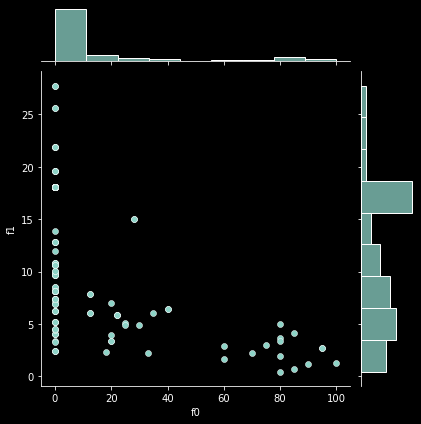

In [232]:
cols = [f"f{i}" for i in range(len(x[0]))] + ["y"]
data = np.hstack([x_test, y_test.reshape(-1, 1)])
df = pd.DataFrame(data, columns=cols)

sns.jointplot(data=df, x="f0", y="f1")
plt.show()

### MinMax Scaler

In [233]:
class MinMaxScaler:
    def __init__(self) -> None:
        self.data_min: np.ndarray = None
        self.data_max: np.ndarray = None

    def fit(self, x: np.ndarray) -> None:
        self.data_min = np.min(x, axis=0)
        self.data_max = np.max(x, axis=0)

    def transform(self, x: np.ndarray) -> np.ndarray:
        x_transformed = (x - self.data_min) / (self.data_max - self.data_min)
        return x_transformed

In [234]:
scaler = MinMaxScaler()
scaler.fit(x)
x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)

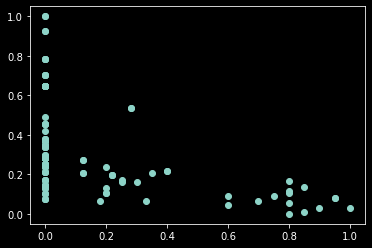

Min: [0. 0.]
Max: [1. 1.]
Mean: [0.11269737 0.39169577]
Std: [0.24901509 0.24468351]


In [235]:
plt.scatter(x_test_transformed[:, 0], x_test_transformed[:, 1])
plt.show()

print(f"Min: {np.min(x_test_transformed, axis=0)}")
print(f"Max: {np.max(x_test_transformed, axis=0)}")
print(f"Mean: {np.mean(x_test_transformed, axis=0)}")
print(f"Std: {np.std(x_test_transformed, axis=0)}")

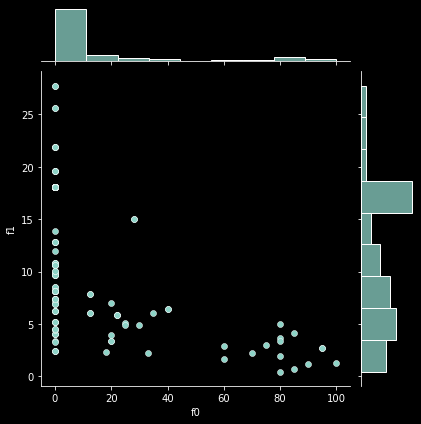

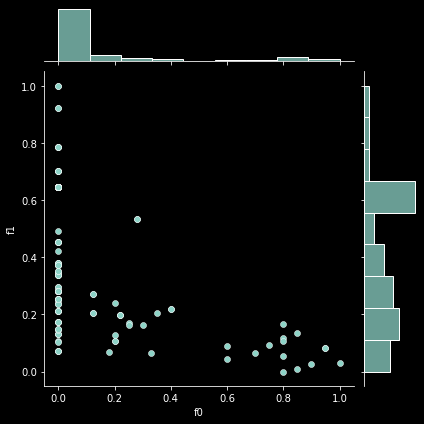

In [236]:
cols = [f"f{i}" for i in range(len(x[0]))] + ["y"]
data = np.hstack([x_test_transformed, y_test.reshape(-1, 1)])
df_minmax = pd.DataFrame(data, columns=cols)

sns.jointplot(data=df, x="f0", y="f1")
sns.jointplot(data=df_minmax, x="f0", y="f1")
plt.show()

### Standard Scaler

In [237]:
class StandardScaler:
    def __init__(self) -> None:
        self.mean_: np.ndarray = None
        self.scale_: np.ndarray = None

    def fit(self, x: np.ndarray) -> None:
        self.mean_ = np.mean(x, axis=0)
        self.scale_ = np.std(x, axis=0)

    def transform(self, x: np.ndarray) -> np.ndarray:
        x_transformed = (x - self.mean_) / self.scale_
        return x_transformed

In [238]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)

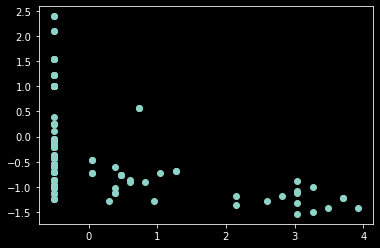

Min: [-0.50512499 -1.54037985]
Max: [3.92425933 2.39678516]
Mean: [-0.00594503  0.00179102]
Std: [1.10298352 0.96335937]


In [239]:
plt.scatter(x_test_transformed[:, 0], x_test_transformed[:, 1])
plt.show()

print(f"Min: {np.min(x_test_transformed, axis=0)}")
print(f"Max: {np.max(x_test_transformed, axis=0)}")
print(f"Mean: {np.mean(x_test_transformed, axis=0)}")
print(f"Std: {np.std(x_test_transformed, axis=0)}")

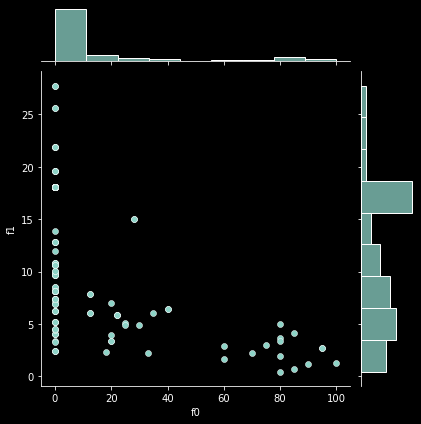

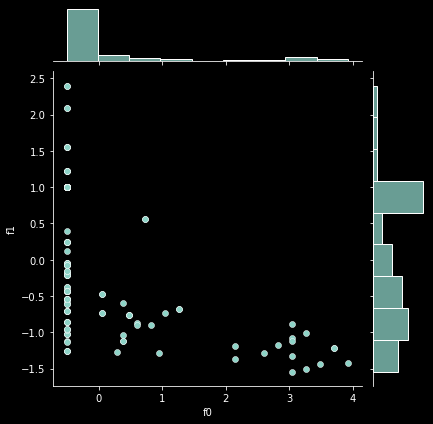

In [240]:
cols = [f"f{i}" for i in range(len(x[0]))] + ["y"]
data = np.hstack([x_test_transformed, y_test.reshape(-1, 1)])
df_standard = pd.DataFrame(data, columns=cols)

sns.jointplot(data=df, x="f0", y="f1")
sns.jointplot(data=df_standard, x="f0", y="f1")
plt.show()